In [37]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [42]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
c1df=pd.read_csv("data/전체인프라.csv")
c2df=pd.read_csv("data/전체복지시설.csv")

c3df=pd.read_csv("data/경남인구분포.csv")
c4df=pd.read_csv("data/경남버스.csv")

In [3]:
pd.merge(pd.concat([c1df,c2df]).groupby("city").count()["index"],
pd.merge(c4df.groupby("city").count()["station"],c3df[["city","popul_old"]],
how="left",on="city"),how="left",on="city")

,city,index,station,popul_old
0,거제시,204,665.0,"23,863"
1,거창군,98,337.0,"15,966"
2,고성군,72,357.0,"14,813"
3,김해시,524,787.0,"56,571"
4,남해군,65,246.0,"15,169"
5,밀양시,129,325.0,"26,929"
6,사천시,147,366.0,"22,906"
7,산청군,57,217.0,"11,808"
8,양산시,370,621.0,"43,572"
9,의령군,49,308.0,"9,132"


In [7]:
data2=pd.read_csv("data/2020_65세이상_경남치매유병현황.csv")
data8=pd.read_csv("data/경남_독거노인가구비율.csv")

In [10]:
data2.head()

,행정구역(기초)별,노인인구수,치매환자수,치매유병률,경도인지장애환자수,경도인지장애유병률
0,진주시,"57,117","5,971.13",10.45%,"13,057.50",22.86%
1,통영시,"24,325.50","2,371.93",9.75%,"5,461.08",22.45%
2,사천시,"23,840","2,674.91",11.22%,"5,571.90",23.37%
3,김해시,"59,059.50","5,604.77",9.49%,"13,178.87",22.31%
4,밀양시,"28,926","3,217.01",11.12%,"6,739.28",23.30%


In [11]:
pd.merge(data2[["경도인지장애환자수","행정구역(기초)별"]],data8[["행정구역별","65세이상 1인가구"]],how="left",left_on="행정구역(기초)별",right_on="행정구역별").drop("행정구역(기초)별",axis=1)

,경도인지장애환자수,행정구역별,65세이상 1인가구
0,"13,057.50",진주시,13355
1,"5,461.08",통영시,5886
2,"5,571.90",사천시,5766
3,"13,178.87",김해시,12296
4,"6,739.28",밀양시,7787
5,"5,711.13",거제시,5241
6,"10,298.98",양산시,10111
7,"31,889.24",창원시,30993
8,"2,406.09",의령군,2962
9,"3,681.17",함안군,4139


In [12]:
total=pd.merge(pd.merge(pd.concat([c1df,c2df]).groupby("city").count()["index"],
pd.merge(c4df.groupby("city").count()["station"],c3df[["city","popul_old"]],
how="left",on="city"),how="left",on="city") ,pd.merge(data2[["경도인지장애환자수","행정구역(기초)별"]],data8[["행정구역별","65세이상 1인가구"]],how="left",left_on="행정구역(기초)별",right_on="행정구역별").drop("행정구역(기초)별",axis=1),how="left",
left_on="city",right_on="행정구역별")
total

,city,index,station,popul_old,경도인지장애환자수,행정구역별,65세이상 1인가구
0,거제시,204,665.0,"23,863","5,711.13",거제시,5241.0
1,거창군,98,337.0,"15,966","4,080.52",거창군,4599.0
2,고성군,72,357.0,"14,813","3,734.82",고성군,4134.0
3,김해시,524,787.0,"56,571","13,178.87",김해시,12296.0
4,남해군,65,246.0,"15,169","3,915.61",남해군,4502.0
5,밀양시,129,325.0,"26,929","6,739.28",밀양시,7787.0
6,사천시,147,366.0,"22,906","5,571.90",사천시,5766.0
7,산청군,57,217.0,"11,808","3,039.05",산청군,3297.0
8,양산시,370,621.0,"43,572","10,298.98",양산시,10111.0
9,의령군,49,308.0,"9,132","2,406.09",의령군,2962.0


In [13]:
total=total[total.columns.difference(["행정구역별"]) ]
total

,65세이상 1인가구,city,index,popul_old,station,경도인지장애환자수
0,5241.0,거제시,204,"23,863",665.0,"5,711.13"
1,4599.0,거창군,98,"15,966",337.0,"4,080.52"
2,4134.0,고성군,72,"14,813",357.0,"3,734.82"
3,12296.0,김해시,524,"56,571",787.0,"13,178.87"
4,4502.0,남해군,65,"15,169",246.0,"3,915.61"
5,7787.0,밀양시,129,"26,929",325.0,"6,739.28"
6,5766.0,사천시,147,"22,906",366.0,"5,571.90"
7,3297.0,산청군,57,"11,808",217.0,"3,039.05"
8,10111.0,양산시,370,"43,572",621.0,"10,298.98"
9,2962.0,의령군,49,"9,132",308.0,"2,406.09"


In [14]:
total.columns=['65세이상 1인가구', 'city', '인프라', 'popul_old', 'station', '경도인지장애환자수']
total

,65세이상 1인가구,city,인프라,popul_old,station,경도인지장애환자수
0,5241.0,거제시,204,"23,863",665.0,"5,711.13"
1,4599.0,거창군,98,"15,966",337.0,"4,080.52"
2,4134.0,고성군,72,"14,813",357.0,"3,734.82"
3,12296.0,김해시,524,"56,571",787.0,"13,178.87"
4,4502.0,남해군,65,"15,169",246.0,"3,915.61"
5,7787.0,밀양시,129,"26,929",325.0,"6,739.28"
6,5766.0,사천시,147,"22,906",366.0,"5,571.90"
7,3297.0,산청군,57,"11,808",217.0,"3,039.05"
8,10111.0,양산시,370,"43,572",621.0,"10,298.98"
9,2962.0,의령군,49,"9,132",308.0,"2,406.09"


In [17]:
total.to_excel('창.xlsx')

In [18]:
dd=pd.read_excel("창.xlsx")
dd 

,Unnamed: 0,65세이상 1인가구,city,인프라,popul_old,station,경도인지장애환자수
0,0,5241,거제시,204,"23,863",665,"5,711.13"
1,1,4599,거창군,98,"15,966",337,"4,080.52"
2,2,4134,고성군,72,"14,813",357,"3,734.82"
3,3,12296,김해시,524,"56,571",787,"13,178.87"
4,4,4502,남해군,65,"15,169",246,"3,915.61"
5,5,7787,밀양시,129,"26,929",325,"6,739.28"
6,6,5766,사천시,147,"22,906",366,"5,571.90"
7,7,3297,산청군,57,"11,808",217,"3,039.05"
8,8,10111,양산시,370,"43,572",621,"10,298.98"
9,9,2962,의령군,49,"9,132",308,"2,406.09"


In [19]:
del dd['Unnamed: 0']

In [20]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   65세이상 1인가구  18 non-null     int64 
 1   city        18 non-null     object
 2   인프라         18 non-null     int64 
 3   popul_old   18 non-null     object
 4   station     18 non-null     int64 
 5   경도인지장애환자수   18 non-null     object
dtypes: int64(3), object(3)
memory usage: 992.0+ bytes


In [21]:
dd.columns

Index(['65세이상 1인가구', 'city', '인프라', 'popul_old', 'station', '경도인지장애환자수'], dtype='object')

In [22]:
d=dd[['65세이상 1인가구',  '인프라', 'popul_old', 'station', '경도인지장애환자수']]
d

,65세이상 1인가구,인프라,popul_old,station,경도인지장애환자수
0,5241,204,"23,863",665,"5,711.13"
1,4599,98,"15,966",337,"4,080.52"
2,4134,72,"14,813",357,"3,734.82"
3,12296,524,"56,571",787,"13,178.87"
4,4502,65,"15,169",246,"3,915.61"
5,7787,129,"26,929",325,"6,739.28"
6,5766,147,"22,906",366,"5,571.90"
7,3297,57,"11,808",217,"3,039.05"
8,10111,370,"43,572",621,"10,298.98"
9,2962,49,"9,132",308,"2,406.09"


In [23]:
d["popul_old"]=pd.to_numeric(d["popul_old"].str.replace(",","") )

In [24]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   65세이상 1인가구  18 non-null     int64 
 1   인프라         18 non-null     int64 
 2   popul_old   18 non-null     int64 
 3   station     18 non-null     int64 
 4   경도인지장애환자수   18 non-null     object
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes


In [25]:
d

,65세이상 1인가구,인프라,popul_old,station,경도인지장애환자수
0,5241,204,23863,665,"5,711.13"
1,4599,98,15966,337,"4,080.52"
2,4134,72,14813,357,"3,734.82"
3,12296,524,56571,787,"13,178.87"
4,4502,65,15169,246,"3,915.61"
5,7787,129,26929,325,"6,739.28"
6,5766,147,22906,366,"5,571.90"
7,3297,57,11808,217,"3,039.05"
8,10111,370,43572,621,"10,298.98"
9,2962,49,9132,308,"2,406.09"


In [27]:
d.to_excel('타입변경.xlsx')

In [30]:
d = pd.read_excel('타입변경.xlsx')
del d['Unnamed: 0']

In [31]:
d["복지필요도"]=d["65세이상 1인가구"]+d["경도인지장애환자수"]
d

,65세이상 1인가구,인프라,popul_old,station,경도인지장애환자수,복지필요도
0,5241,204,23863,665,5711.13,10952.13
1,4599,98,15966,337,4080.52,8679.52
2,4134,72,14813,357,3734.82,7868.82
3,12296,524,56571,787,13178.87,25474.87
4,4502,65,15169,246,3915.61,8417.61
5,7787,129,26929,325,6739.28,14526.28
6,5766,147,22906,366,5571.90,11337.90
7,3297,57,11808,217,3039.05,6336.05
8,10111,370,43572,621,10298.98,20409.98
9,2962,49,9132,308,2406.09,5368.09


In [32]:
d.columns

Index(['65세이상 1인가구', '인프라', 'popul_old', 'station', '경도인지장애환자수', '복지필요도'], dtype='object')

In [33]:
ddd=d[['인프라', 'popul_old', 'station', '복지필요도']]
ddd

,인프라,popul_old,station,복지필요도
0,204,23863,665,10952.13
1,98,15966,337,8679.52
2,72,14813,357,7868.82
3,524,56571,787,25474.87
4,65,15169,246,8417.61
5,129,26929,325,14526.28
6,147,22906,366,11337.90
7,57,11808,217,6336.05
8,370,43572,621,20409.98
9,49,9132,308,5368.09


<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='popul_old', ylabel='복지필요도'>

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='popul_old', ylabel='station'>

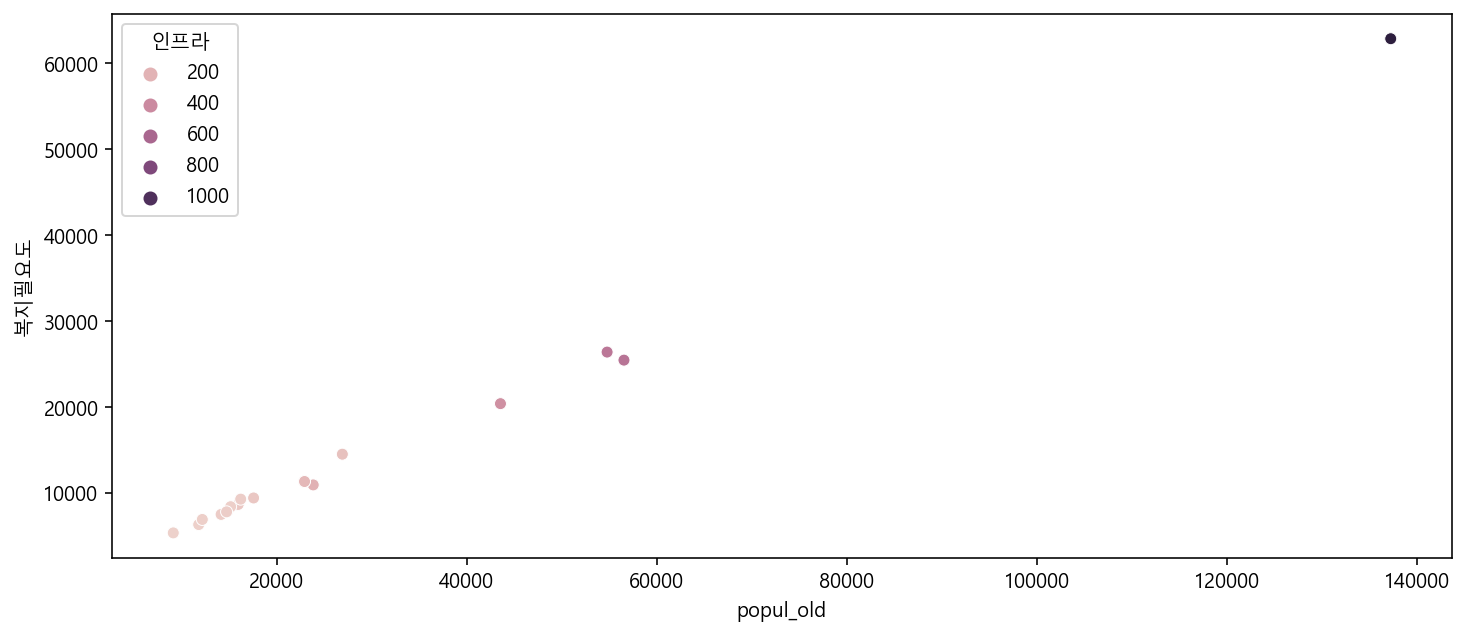

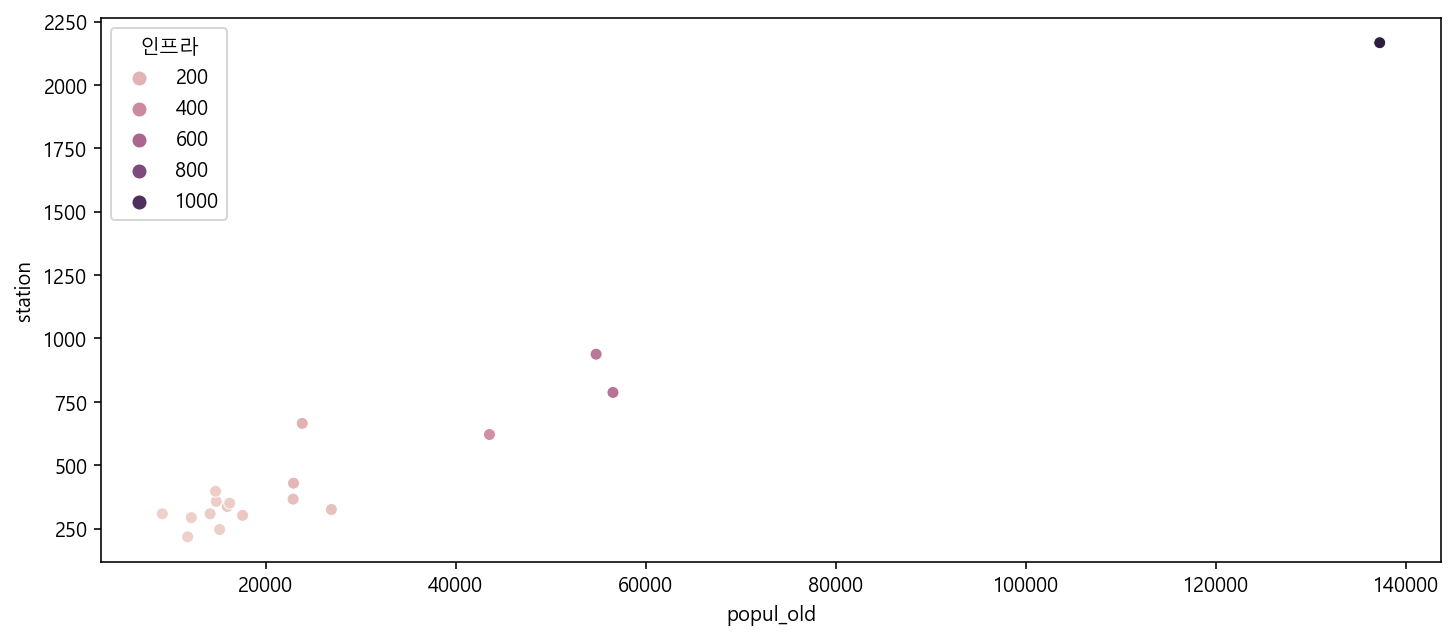

In [43]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='popul_old', y='복지필요도', data=ddd, hue='인프라')

plt.figure(figsize=(12, 5))
sns.scatterplot(x='popul_old', y='station', data=ddd, hue='인프라')

In [44]:
ddd

,인프라,popul_old,station,복지필요도
0,204,23863,665,10952.13
1,98,15966,337,8679.52
2,72,14813,357,7868.82
3,524,56571,787,25474.87
4,65,15169,246,8417.61
5,129,26929,325,14526.28
6,147,22906,366,11337.90
7,57,11808,217,6336.05
8,370,43572,621,20409.98
9,49,9132,308,5368.09


In [45]:
ddd.to_excel("노인_total.xlsx")

In [46]:
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
mall_scaled_df2 = pd.DataFrame(standard_scaler.fit_transform(ddd), columns=ddd.columns)

In [47]:
mall_scaled_df2

,인프라,popul_old,station,복지필요도
0,0.141037,0.114954,0.229744,0.097090
1,0.044586,0.053329,0.061538,0.057576
2,0.020928,0.044332,0.071795,0.043480
3,0.432211,0.370192,0.292308,0.349597
4,0.014559,0.047110,0.014872,0.053022
5,0.072793,0.138880,0.055385,0.159234
6,0.089172,0.107486,0.076410,0.103797
7,0.007279,0.020882,0.000000,0.016830
8,0.292084,0.268754,0.207179,0.261534
9,0.000000,0.000000,0.046667,0.000000


In [49]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
labels = agg_clustering.fit_predict(ddd)

In [50]:
from mpl_toolkits.mplot3d import Axes3D

In [52]:
mall_scaled_df2.columns

Index(['인프라', 'popul_old', 'station', '복지필요도'], dtype='object')

Text(0.5, 0.92, 'CLUSter')

Text(0.5, 0, 'station')

Text(0.5, 0, '인프라')

Text(0.5, 0, 'popul_old')

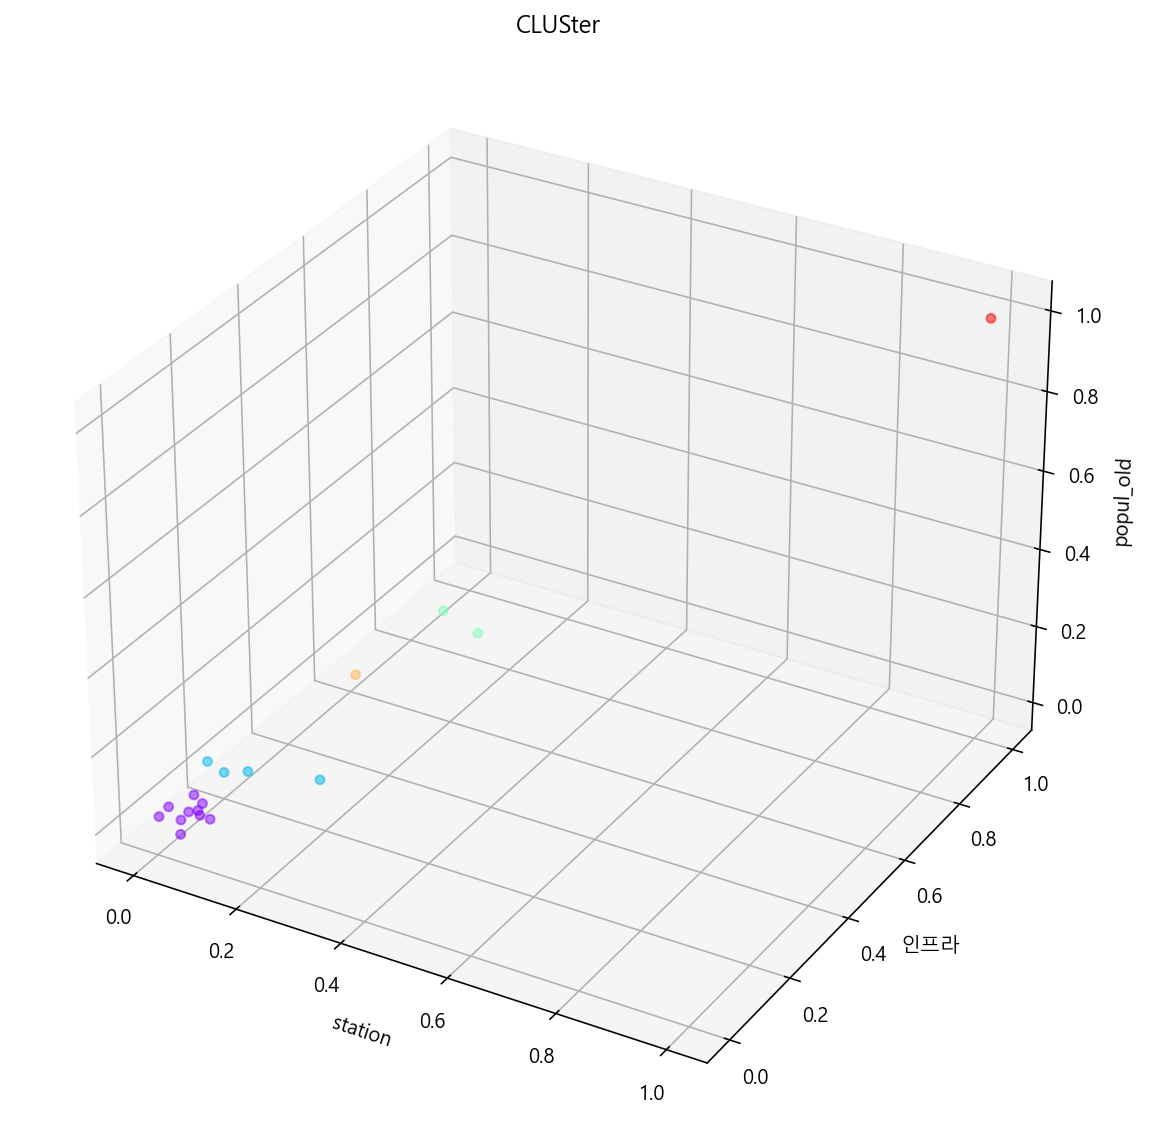

In [53]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = mall_scaled_df2['station']
y = mall_scaled_df2['인프라']
z = mall_scaled_df2['popul_old']
ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.set_title('CLUSter')
ax.set_xlabel('station')
ax.set_ylabel('인프라')
ax.set_zlabel('popul_old')

In [54]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
labels = agg_clustering.fit_predict(ddd)

Text(0.5, 0.92, 'CLUSter')

Text(0.5, 0, '복지필요도')

Text(0.5, 0, '인프라')

Text(0.5, 0, 'popul_old')

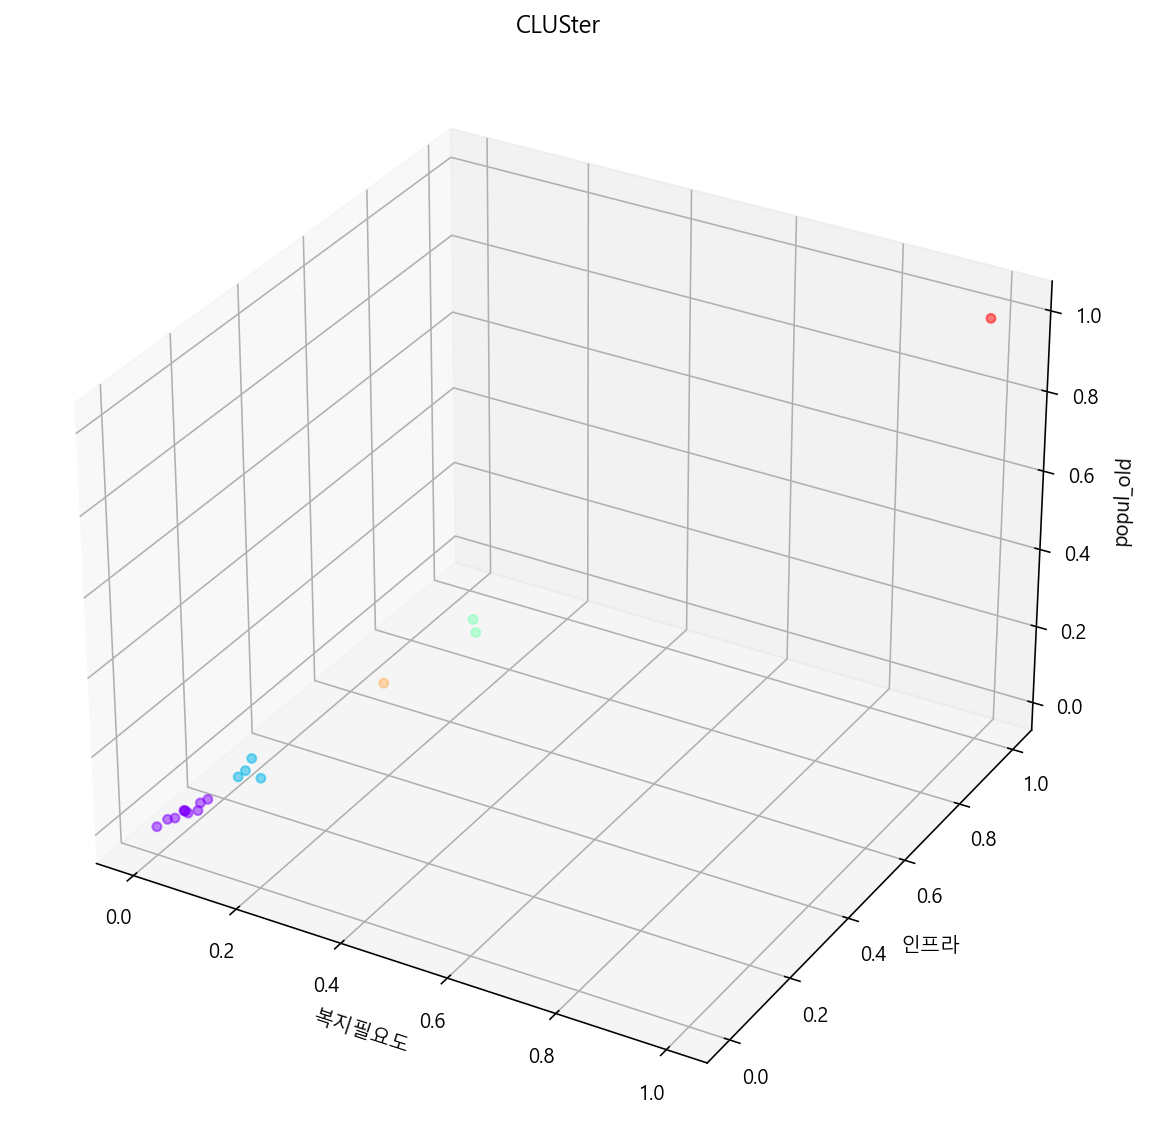

In [55]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = mall_scaled_df2['복지필요도']
y = mall_scaled_df2['인프라']
z = mall_scaled_df2['popul_old']
ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.set_title('CLUSter')
ax.set_xlabel('복지필요도')
ax.set_ylabel('인프라')
ax.set_zlabel('popul_old')

Text(0.5, 0.92, 'CLUSter')

Text(0.5, 0, 'station')

Text(0.5, 0, '인프라')

Text(0.5, 0, 'popul_old')

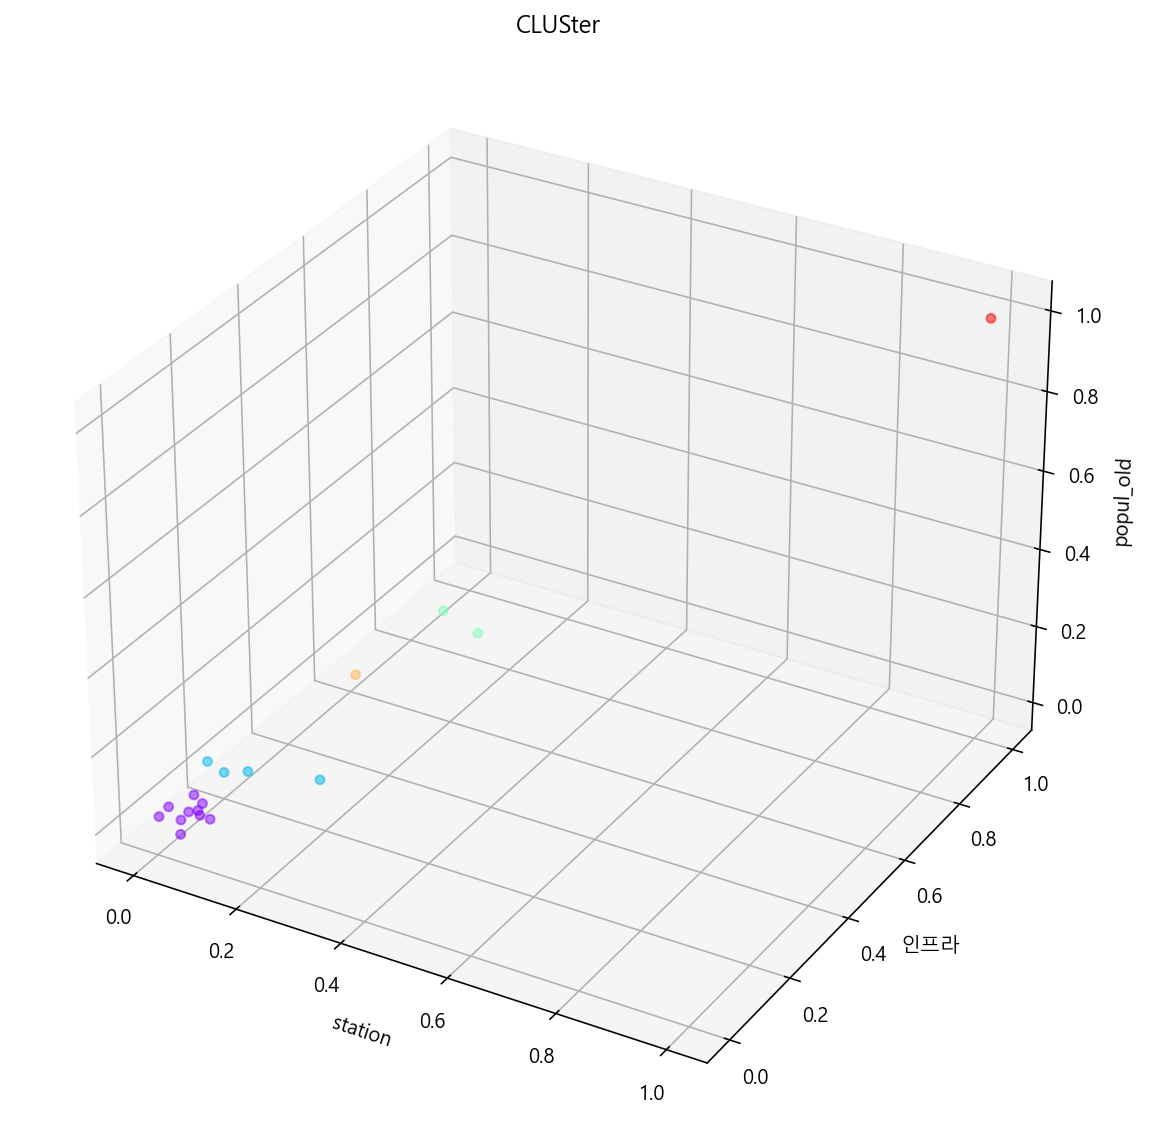

In [56]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = mall_scaled_df2['station']
y = mall_scaled_df2['인프라']
z = mall_scaled_df2['popul_old']
ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.set_title('CLUSter')
ax.set_xlabel('station')
ax.set_ylabel('인프라')
ax.set_zlabel('popul_old')

In [57]:
o=pd.read_excel("노인_total.xlsx")
o

,Unnamed: 0,인프라,popul_old,station,복지필요도
0,0,204,23863,665,10952.13
1,1,98,15966,337,8679.52
2,2,72,14813,357,7868.82
3,3,524,56571,787,25474.87
4,4,65,15169,246,8417.61
5,5,129,26929,325,14526.28
6,6,147,22906,366,11337.90
7,7,57,11808,217,6336.05
8,8,370,43572,621,20409.98
9,9,49,9132,308,5368.09


In [58]:
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
mall_scaled_df2 = pd.DataFrame(standard_scaler.fit_transform(o), columns=o.columns)

In [59]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
labels = agg_clustering.fit_predict(o)

Text(0.5, 0.92, 'CLUSter')

Text(0.5, 0, '복지필요도')

Text(0.5, 0, '인프라')

Text(0.5, 0, 'popul_old')

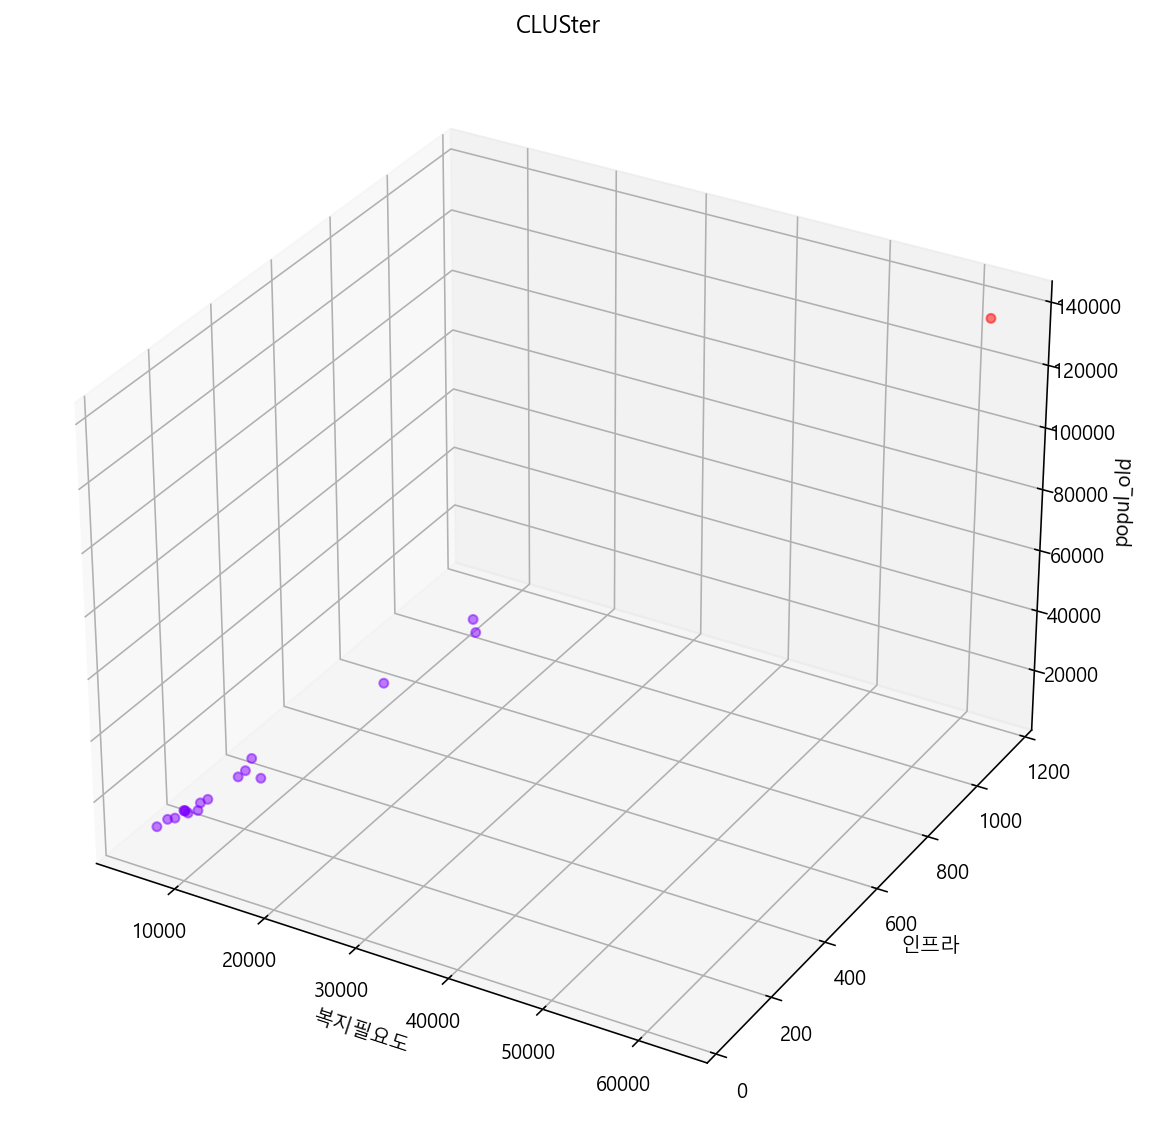

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = o['복지필요도']
y = o['인프라']
z = o['popul_old']
ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.set_title('CLUSter')
ax.set_xlabel('복지필요도')
ax.set_ylabel('인프라')
ax.set_zlabel('popul_old')

Text(0.5, 0.92, 'CLUSter')

Text(0.5, 0, '복지필요도')

Text(0.5, 0, '인프라')

Text(0.5, 0, 'popul_old')

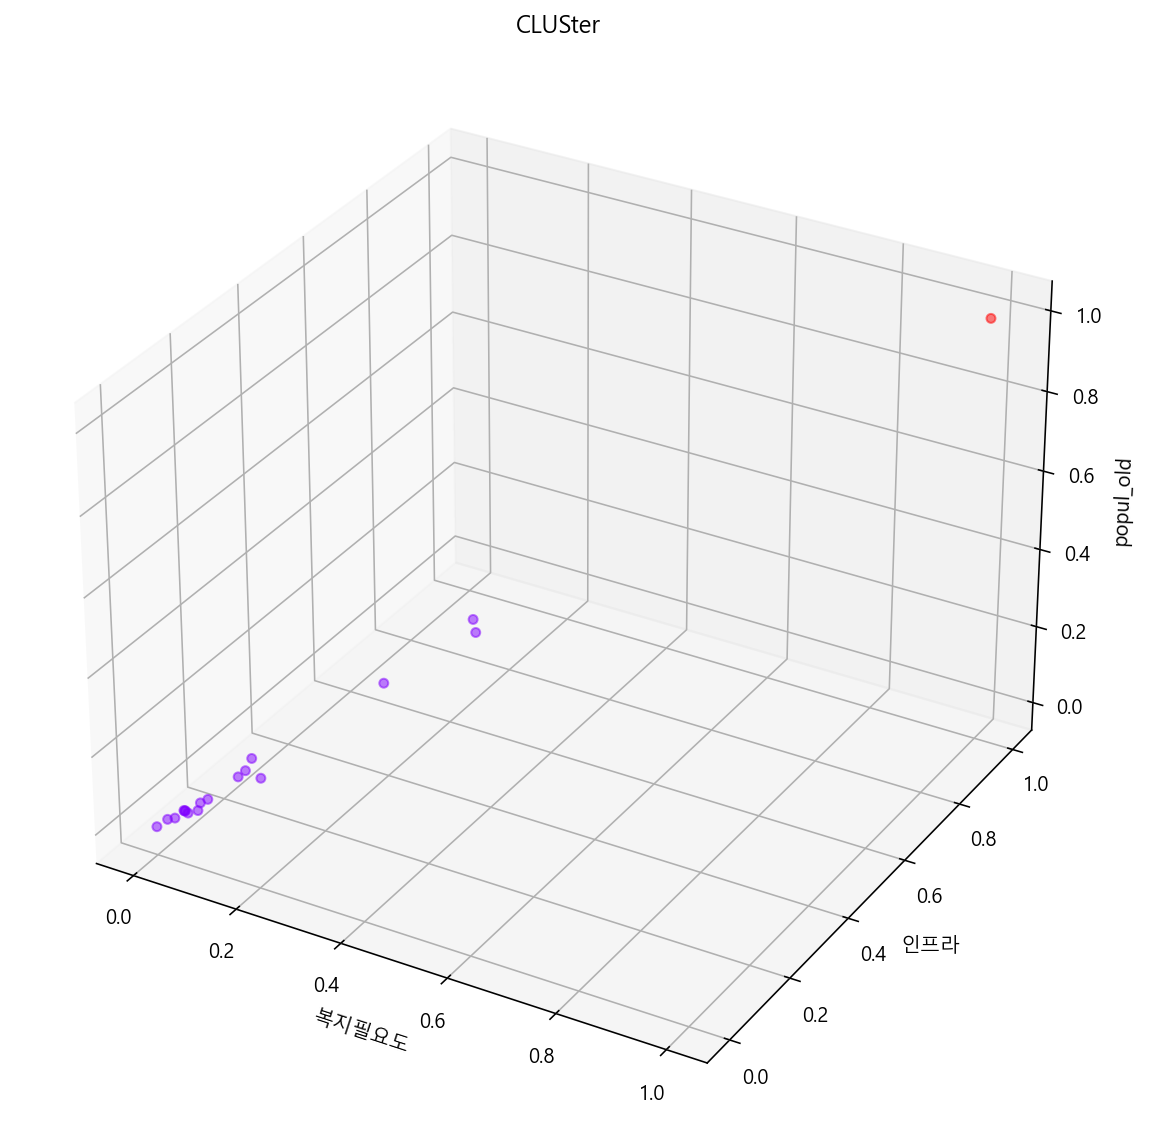

In [61]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = mall_scaled_df2['복지필요도']
y = mall_scaled_df2['인프라']
z = mall_scaled_df2['popul_old']
ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.set_title('CLUSter')
ax.set_xlabel('복지필요도')
ax.set_ylabel('인프라')
ax.set_zlabel('popul_old')

# 계층적 군집 분석(Hierarchical Clustering)

In [107]:
o=pd.read_excel("노인_total.xlsx")
del o['Unnamed: 0']
o

,인프라,popul_old,station,복지필요도
0,204,23863,665,10952.13
1,98,15966,337,8679.52
2,72,14813,357,7868.82
3,524,56571,787,25474.87
4,65,15169,246,8417.61
5,129,26929,325,14526.28
6,147,22906,366,11337.90
7,57,11808,217,6336.05
8,370,43572,621,20409.98
9,49,9132,308,5368.09


In [108]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [109]:
 mall_scaled_df2

,인프라,popul_old,station,복지필요도
0,0.141037,0.114954,0.229744,0.097090
1,0.044586,0.053329,0.061538,0.057576
2,0.020928,0.044332,0.071795,0.043480
3,0.432211,0.370192,0.292308,0.349597
4,0.014559,0.047110,0.014872,0.053022
5,0.072793,0.138880,0.055385,0.159234
6,0.089172,0.107486,0.076410,0.103797
7,0.007279,0.020882,0.000000,0.016830
8,0.292084,0.268754,0.207179,0.261534
9,0.000000,0.000000,0.046667,0.000000


In [110]:
mergings = linkage(mall_scaled_df2, method='complete')

In [111]:
from scipy.cluster.hierarchy import cut_tree
num_of_cluster = 3
cluster_info = cut_tree(mergings, num_of_cluster)

In [112]:
cluster_info

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(mall_scaled_df2, 'single')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [72.5, 72.5, 111.25, 111.25],
  [50.0, 50.0, 91.875, 91.875],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [70.9375, 70.9375, 153.75, 153.75],
  [22.5, 22.5, 112.34375, 112.34375],
  [5.0, 5.0, 67.421875, 67.421875]],
 'dcoord': [[0.0, 0.0825790133807648, 0.0825790133807648, 0.0],
  [0.0, 0.24420292327053236, 0.24420292327053236, 0.0825790133807648],
  [0.0, 0.054314664840343904, 0.054314664840343904, 0.0],
  [0.0, 0.023292178266458335, 0.023292178266458335, 0.0],
  [0.0, 0.04232126870164368, 0.04232126870164368, 0.023292178266458335],
  [0.0, 0.02570838890358757, 0.02570838890358757, 0.0],
  [0.0, 0.020557460674263756, 0.020557460674263756, 0.0],
  [0.0, 0.037

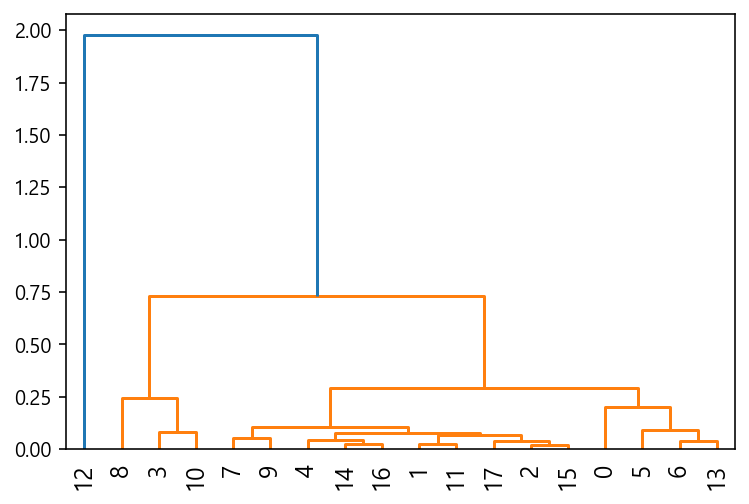

In [115]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(mergings, leaf_rotation=90., truncate_mode='lastp', p=18)
plt.show()

<Figure size 432x288 with 0 Axes>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [40.0, 40.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [70.0, 70.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [77.5, 77.5, 110.0, 110.0],
  [93.75, 93.75, 135.0, 135.0],
  [114.375, 114.375, 145.0, 145.0],
  [129.6875, 129.6875, 155.0, 155.0],
  [47.5, 47.5, 142.34375, 142.34375],
  [94.921875, 94.921875, 165.0, 165.0],
  [17.5, 17.5, 129.9609375, 129.9609375],
  [73.73046875, 73.73046875, 175.0, 175.0]],
 'dcoord': [[0.0, 0.0825790133807648, 0.0825790133807648, 0.0],
  [0.0825790133807648, 0.21196075265576947, 0.21196075265576947, 0.0],
  [0.0, 0.03899775388332552, 0.03899775388332552, 0.0],
  [0.03899775388332552, 0.06905862255253623, 0.06905862255253623, 0.0],
  [0.0, 0.02570838890358757, 0.02570838890358757, 0.0],
  [0.02570838890358757, 0.026888902302829684, 0.026888902302829684, 0.0],
  [0.0, 0.023292178266458335, 0.0232

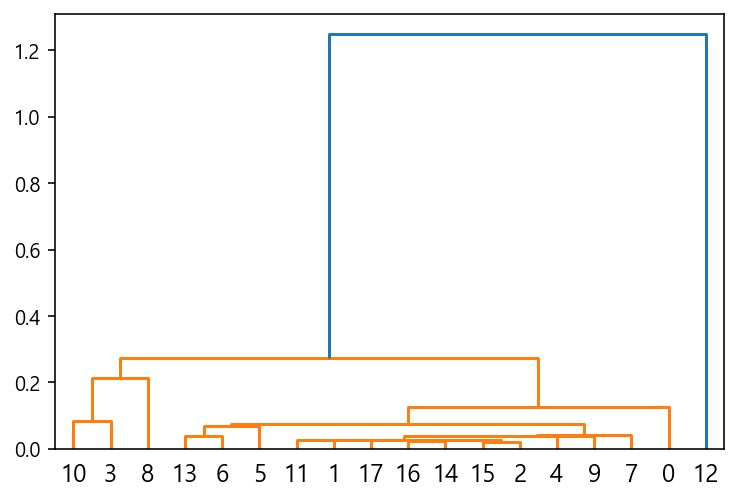

In [116]:
plt.figure()
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
# Cluster1: 0, 5, 6, 13 => 거제, 밀양, 사천, 통영
# Cluster2: 3, 8, 10 => 김해, 양산, 진주